In [1]:
import numpy as np
import cv2
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Visualize the average canopy cover percentage progression 

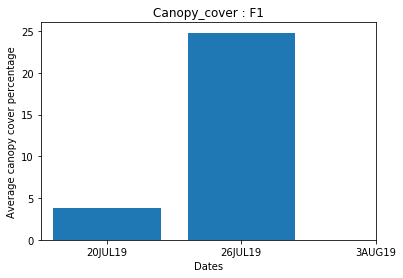

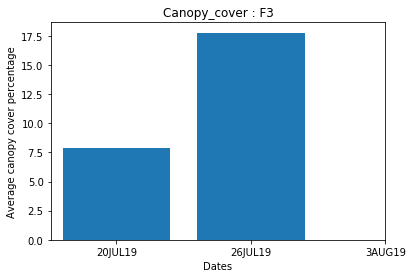

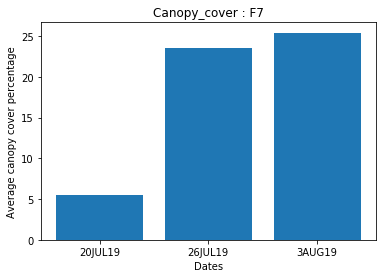

In [17]:
q = pd.read_csv('canopy.csv')

fields = ['F1','F3','F7']

for i in range(len(fields)):
    
    f1 = q[q['filename'].str.contains(fields[i])] 
    date1 = f1[f1['filename'].str.contains('20JUL19')]

    mean1 = date1.mean()
    #print(mean1)


    x = date1['canopy_cover_percent'].values
    x = np.array(x)
    #print(np.mean(x))

    f2 = q[q['filename'].str.contains(fields[i])] 
    date2 = f2[f2['filename'].str.contains('26JUL19')]

    mean2 = date2.mean()

    x = date2['canopy_cover_percent'].values
    x = np.array(x)

    f3 = q[q['filename'].str.contains(fields[i])] 
    date3 = f3[f3['filename'].str.contains('3AUG19')]
    mean3 = date3.mean()


    x = [0,1,2]
    plt.bar(x,[mean1[0]*100,mean2[0]*100,mean3[0]*100])
    plt.xticks(x,['20JUL19','26JUL19','3AUG19'])
    plt.title('Canopy_cover :' + ' ' + fields[i])
    plt.xlabel('Dates')
    plt.ylabel('Average canopy cover percentage')
    plt.show()

# Calculate the RMSE for the progression

In [18]:
#RMSE

filenames = os.listdir('test_img')
df1 = pd.read_csv('canopy_gt.csv')
df2 = pd.read_csv('canopy.csv')

fields = ['F1','F3','F7']

for i in range(len(fields)):
    
    # read the ground truth values

    f1 = df1[df1['filename'].str.contains(fields[i])] 
    date1 = f1[f1['filename'].str.contains('20JUL19')]
    x1 = date1['canopy_cover_percent'].values

    f2 = df1[df1['filename'].str.contains(fields[i])] 
    date2 = f2[f2['filename'].str.contains('26JUL19')]
    x2 = date2['canopy_cover_percent'].values

    f3 = df1[df1['filename'].str.contains(fields[i])] 
    date3 = f3[f3['filename'].str.contains('3AUG19')]
    x3 = date3['canopy_cover_percent'].values
    x_hat = np.concatenate((x1,x2,x3))
    
    # read the predicted canopy cover values
    
    f1 = df2[df2['filename'].str.contains(fields[i])] 
    date1 = f1[f1['filename'].str.contains('20JUL19')]
    x1 = date1['canopy_cover_percent'].values


    f2 = df2[df2['filename'].str.contains(fields[i])] 
    date2 = f2[f2['filename'].str.contains('26JUL19')]
    x2 = date2['canopy_cover_percent'].values


    f3 = df2[df2['filename'].str.contains(fields[i])] 
    date3 = f3[f3['filename'].str.contains('3AUG19')]
    x3 = date3['canopy_cover_percent'].values
    x = np.concatenate((x1,x2,x3))

    print('RMSE', fields[i], ':', np.sqrt(np.mean(sum((x_hat-x) * (x_hat-x)))))

RMSE F1 : 0.36239708194589165
RMSE F3 : 0.14613046722087242
RMSE F7 : 0.9559942436130704
